# Projeto Interpretabilidade de modelos 

Grupo:
- Lucas dos Reis Silva
- Gabriel Homci




In [36]:
import pandas as pd
import os 
from rich import print as rprint


In [37]:

pasta = 'dataset'

arquivos = [f for f in os.listdir(pasta) if f.endswith('.csv')]
print(arquivos)

dfs = []
for arquivo in arquivos:
    caminho_completo = os.path.join(pasta, arquivo)
    df = pd.read_csv(caminho_completo)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

len(df)


['permier_league_2021.csv', 'permier_league_2022.csv', 'permier_league_2023.csv', 'permier_league_2024.csv', 'premier_league_2025.csv']


1610

In [38]:
"""
df = pd.read_csv("dataset/permier_league_2024.csv")
df.head()

"""

'\ndf = pd.read_csv("dataset/permier_league_2024.csv")\ndf.head()\n\n'

In [39]:
len(df)

1610

In [40]:
columns = [
    "Date",
    "HomeTeam",
    "AwayTeam",
    "FTHG",
    "FTAG",
    "FTR",
    "HTHG",
    "HTAG",
    "HTR",
    "HS",
    "AS",
    "HST",
    "AST",
    "HF",
    "AF",
    "HC",
    "AC",
    "HY",
    "AY",
    "HR",
    "AR",
]

df = df[columns]
column_map = {
    "Date": "match_date",
    "HomeTeam": "home_team",
    "AwayTeam": "away_team",
    "FTHG": "full_time_home_goals",
    "FTAG": "full_time_away_goals",
    "FTR": "full_time_result",
    "HTHG": "half_time_home_goals",
    "HTAG": "half_time_away_goals",
    "HTR": "half_time_result",
    "HS": "home_shots",
    "AS": "away_shots",
    "HST": "home_shots_on_target",
    "AST": "away_shots_on_target",
    "HF": "home_fouls",
    "AF": "away_fouls",
    "HC": "home_corners",
    "AC": "away_corners",
    "HY": "home_yellow_cards",
    "AY": "away_yellow_cards",
    "HR": "home_red_cards",
    "AR": "away_red_cards",
}

df = df.rename(columns=column_map)
teams = df["home_team"].unique()
teams_map = {team:i+1 for i,team in enumerate(teams)}
teams_map_reverse = {i+1:i+1 for i,team in enumerate(teams)}

df['half_time_result'] = df['half_time_result'].map({'A': 0, 'D': 1, 'H': 2})
df['full_time_result'] = df['full_time_result'].map({'A': 0, 'D': 1, 'H': 2})
df['home_team'] = df['home_team'].map(teams_map)
df['away_team'] = df['away_team'].map(teams_map)
df['match_date'] = pd.to_datetime(df['match_date']) 
df = df.sort_values('match_date').reset_index(drop=True)
df

C:\Users\gabriel.serapiao\AppData\Local\Temp\ipykernel_21712\547852214.py:59: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['match_date'] = pd.to_datetime(df['match_date'])


,match_date,home_team,away_team,full_time_home_goals,full_time_away_goals,full_time_result,half_time_home_goals,half_time_away_goals,half_time_result,home_shots,...,home_shots_on_target,away_shots_on_target,home_fouls,away_fouls,home_corners,away_corners,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards
0,2021-08-13,1,19,2,0,2,1,0,2,8,...,3,4,12,8,2,5,0,0,0,0
1,2021-08-14,2,14,5,1,2,1,0,2,16,...,8,3,11,9,5,4,1,2,0,0
2,2021-08-14,3,16,1,2,0,1,0,2,14,...,3,8,10,7,7,6,2,1,0,0
3,2021-08-14,4,13,3,0,2,2,0,2,13,...,6,1,15,11,5,2,0,0,0,0
4,2021-08-14,5,17,3,1,2,0,1,0,14,...,6,3,13,15,6,8,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2025-10-26,22,23,2,0,2,2,0,2,13,...,5,4,17,7,6,4,3,1,0,0
1606,2025-10-26,18,3,2,3,0,2,2,1,15,...,7,7,12,7,5,3,1,0,0,0
1607,2025-10-26,19,13,1,0,2,1,0,2,10,...,3,1,6,11,4,3,0,0,0,0
1608,2025-10-26,12,15,1,0,2,1,0,2,9,...,3,4,8,16,5,6,1,4,0,0


In [41]:
dataset = []

teams = df["home_team"].unique()

for _, row in df.iterrows():
    date = row["match_date"]
    home_team = row["home_team"]
    away_team = row["away_team"]
    result = row["full_time_result"]

    cols_to_drop = ["match_date","home_team","away_team"]

    home_stats = df[(df["home_team"]==home_team) & (df["match_date"]<date)].drop(columns=cols_to_drop)
    away_stats = df[(df["away_team"]==away_team) & (df["match_date"]<date)].drop(columns=cols_to_drop)


    if home_stats.shape[0] == 0:
        continue
    if away_stats.shape[0] == 0:
        continue

    pre_match_stats = {"date":date,"result":result,"home_team":home_team,"away_team":away_team}

    for column_name, series in home_stats.items():
        key = f"Home_stats_{column_name}"
        metric = series.mean()
        pre_match_stats[key] = metric

    for column_name, series in away_stats.items():
        key = f"away_stats_{column_name}"
        metric = series.mean()
        pre_match_stats[key] = metric

    dataset.append(pre_match_stats)

In [42]:
df = pd.DataFrame(dataset)
#with pd.option_context('display.max_rows', None):
display(df)  

,date,result,home_team,away_team,Home_stats_full_time_home_goals,Home_stats_full_time_away_goals,Home_stats_full_time_result,Home_stats_half_time_home_goals,Home_stats_half_time_away_goals,Home_stats_half_time_result,...,away_stats_home_shots_on_target,away_stats_away_shots_on_target,away_stats_home_fouls,away_stats_away_fouls,away_stats_home_corners,away_stats_away_corners,away_stats_home_yellow_cards,away_stats_away_yellow_cards,away_stats_home_red_cards,away_stats_away_red_cards
0,2021-08-28,1,20,13,4.000000,1.000000,2.000000,1.000000,0.000000,2.0000,...,6.000000,1.000000,15.000000,11.000000,5.000000,2.000000,0.000000,0.000000,0.00000,0.000000
1,2021-08-28,1,11,4,2.000000,0.000000,2.000000,1.000000,0.000000,2.0000,...,3.000000,5.000000,10.000000,4.000000,9.000000,8.000000,3.000000,0.000000,0.00000,0.000000
2,2021-08-28,0,8,6,0.000000,3.000000,0.000000,0.000000,1.000000,0.0000,...,7.000000,1.000000,8.000000,8.000000,10.000000,0.000000,0.000000,1.000000,0.00000,1.000000
3,2021-08-28,1,9,17,2.000000,4.000000,0.000000,2.000000,1.000000,2.0000,...,6.000000,3.000000,13.000000,15.000000,6.000000,8.000000,2.000000,0.000000,0.00000,0.000000
4,2021-08-28,0,16,5,2.000000,0.000000,2.000000,2.000000,0.000000,2.0000,...,4.000000,8.000000,6.000000,13.000000,8.000000,5.000000,2.000000,4.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2025-10-26,2,22,23,1.245902,1.213115,1.032787,0.491803,0.590164,1.0000,...,5.426230,3.557377,10.573770,11.409836,6.737705,3.868852,1.918033,2.393443,0.04918,0.049180
1572,2025-10-26,0,18,3,1.200000,1.475000,0.912500,0.600000,0.662500,1.0000,...,6.190476,3.142857,9.166667,10.976190,7.404762,4.023810,1.571429,2.071429,0.02381,0.190476
1573,2025-10-26,2,19,13,2.275000,0.950000,1.575000,0.962500,0.325000,1.4125,...,4.312500,4.012500,11.475000,11.512500,5.587500,4.325000,1.800000,2.000000,0.06250,0.037500
1574,2025-10-26,2,12,15,1.862500,1.287500,1.312500,0.862500,0.537500,1.2125,...,3.050000,6.112500,10.087500,8.175000,3.762500,6.350000,1.975000,1.387500,0.06250,0.012500


In [43]:
"""
cutoff_date = pd.to_datetime('2025-05-16')

# Training data (before cutoff)
train_df = df[df['date'] < cutoff_date].drop(columns=["date"])
# Test data (on or after cutoff)
test_df = df[df['date'] >= cutoff_date].drop(columns=["date"])

print(f"Train = {len(train_df)}")
print(f"Test = {len(test_df)}")

X_train = train_df.drop(columns=['result'])
y_train = train_df['result']
X_test = test_df.drop(columns=['result'])
y_test = test_df['result']

"""

'\ncutoff_date = pd.to_datetime(\'2025-05-16\')\n\n# Training data (before cutoff)\ntrain_df = df[df[\'date\'] < cutoff_date].drop(columns=["date"])\n# Test data (on or after cutoff)\ntest_df = df[df[\'date\'] >= cutoff_date].drop(columns=["date"])\n\nprint(f"Train = {len(train_df)}")\nprint(f"Test = {len(test_df)}")\n\nX_train = train_df.drop(columns=[\'result\'])\ny_train = train_df[\'result\']\nX_test = test_df.drop(columns=[\'result\'])\ny_test = test_df[\'result\']\n\n'

In [44]:

n = len(df)
train_size = int(n * 0.90)
test_size = int(n * 0.05)
cutoff_size = n - train_size - test_size

train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:train_size + test_size]
cutoff_df = df.iloc[train_size + test_size:]

X_train = train_df.drop(columns=['date', 'result'])
y_train = train_df['result']

X_test = test_df.drop(columns=['date', 'result'])
y_test = test_df['result']

X_cutoff = cutoff_df.drop(columns=['date', 'result'])
y_cutoff = cutoff_df['result']

print(f"Train = {len(train_df)} ({len(train_df)/n:.1%})")
print(f"Test = {len(test_df)} ({len(test_df)/n:.1%})")
print(f"Cutoff = {len(cutoff_df)} ({len(cutoff_df)/n:.1%})")

Train = 1418 (90.0%)
Test = 78 (4.9%)
Cutoff = 80 (5.1%)


In [45]:
X_train

,home_team,away_team,Home_stats_full_time_home_goals,Home_stats_full_time_away_goals,Home_stats_full_time_result,Home_stats_half_time_home_goals,Home_stats_half_time_away_goals,Home_stats_half_time_result,Home_stats_home_shots,Home_stats_away_shots,...,away_stats_home_shots_on_target,away_stats_away_shots_on_target,away_stats_home_fouls,away_stats_away_fouls,away_stats_home_corners,away_stats_away_corners,away_stats_home_yellow_cards,away_stats_away_yellow_cards,away_stats_home_red_cards,away_stats_away_red_cards
0,20,13,4.000000,1.000000,2.000000,1.000000,0.000000,2.000000,13.000000,5.000000,...,6.000000,1.000000,15.000000,11.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000
1,11,4,2.000000,0.000000,2.000000,1.000000,0.000000,2.000000,27.000000,9.000000,...,3.000000,5.000000,10.000000,4.000000,9.000000,8.000000,3.000000,0.000000,0.000000,0.000000
2,8,6,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,14.000000,19.000000,...,7.000000,1.000000,8.000000,8.000000,10.000000,0.000000,0.000000,1.000000,0.000000,1.000000
3,9,17,2.000000,4.000000,0.000000,2.000000,1.000000,2.000000,17.000000,8.000000,...,6.000000,3.000000,13.000000,15.000000,6.000000,8.000000,2.000000,0.000000,0.000000,0.000000
4,16,5,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,13.000000,10.000000,...,4.000000,8.000000,6.000000,13.000000,8.000000,5.000000,2.000000,4.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2,15,1.666667,1.180556,1.319444,0.638889,0.555556,1.111111,15.986111,12.611111,...,3.083333,6.291667,9.958333,8.180556,3.763889,6.486111,1.972222,1.402778,0.069444,0.013889
1414,21,11,1.584906,1.396226,1.094340,0.679245,0.584906,1.037736,13.358491,11.641509,...,4.125000,5.805556,8.694444,11.166667,3.875000,6.472222,1.763889,1.722222,0.069444,0.083333
1415,1,4,1.611111,1.388889,1.083333,0.722222,0.597222,1.083333,12.750000,13.472222,...,4.597222,4.736111,12.013889,11.347222,4.652778,5.194444,1.986111,2.333333,0.083333,0.069444
1416,6,9,1.283019,1.509434,0.849057,0.622642,0.773585,0.886792,11.113208,14.207547,...,4.847222,4.250000,11.263889,10.027778,5.291667,4.986111,2.125000,1.930556,0.069444,0.000000


In [46]:
import xgboost as xgb
from sklearn.metrics import classification_report

In [47]:
model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=4,
    random_state=42
)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57        27
           1       0.00      0.00      0.00        19
           2       0.46      0.81      0.59        32

    accuracy                           0.51        78
   macro avg       0.37      0.44      0.39        78
weighted avg       0.41      0.51      0.44        78



c:\Users\gabriel.serapiao\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabriel.serapiao\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabriel.serapiao\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

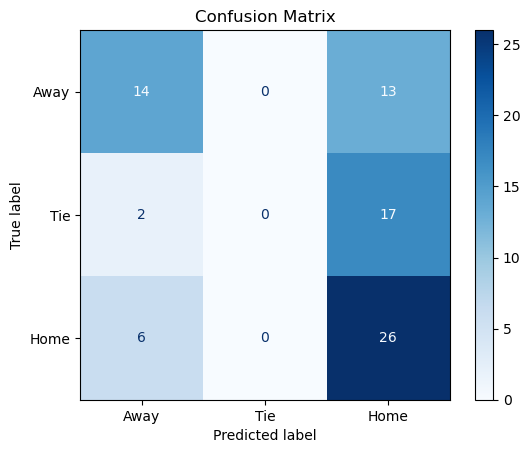

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Away", "Tie", "Home"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

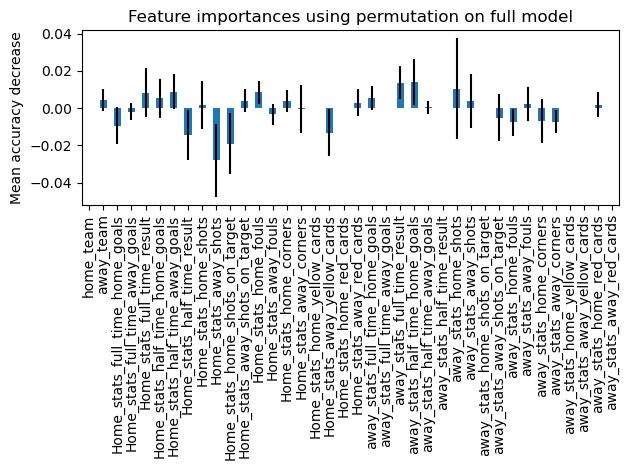

In [49]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(model, X_test, y_test,n_repeats=100, random_state=2)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
m = 0
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()